In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 加载MNIST数据集
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 数据预处理：将数据缩放到0-1之间
x_train, x_test = x_train / 255.0, x_test / 255.0

# 调整数据形状，适应卷积神经网络
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# 输出训练数据和测试数据的形状
print(f"训练集大小: {x_train.shape}, 测试集大小: {x_test.shape}")



训练集大小: (60000, 28, 28, 1), 测试集大小: (10000, 28, 28, 1)


In [2]:

# 构建卷积神经网络模型
model = models.Sequential()

# 第一层卷积层：32个过滤器，大小为3x3，激活函数为ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# 第二层卷积层：64个过滤器，大小为3x3，激活函数为ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 扁平化层：将二维数据展平为一维数据
model.add(layers.Flatten())

# 全连接层：128个神经元，激活函数为ReLU
model.add(layers.Dense(128, activation='relu'))

# 输出层：10个神经元，表示10个类别，激活函数为softmax
model.add(layers.Dense(10, activation='softmax'))

# 输出模型总结
model.summary()


C:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9062 - loss: 0.3031 - val_accuracy: 0.9843 - val_loss: 0.0454
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9854 - loss: 0.0437 - val_accuracy: 0.9890 - val_loss: 0.0334
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9924 - loss: 0.0246 - val_accuracy: 0.9897 - val_loss: 0.0316
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9942 - loss: 0.0183 - val_accuracy: 0.9918 - val_loss: 0.0263
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9967 - loss: 0.0111 - val_accuracy: 0.9902 - val_loss: 0.0310


C:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\Lib\site-packages\IPython\core\pylabtools.p

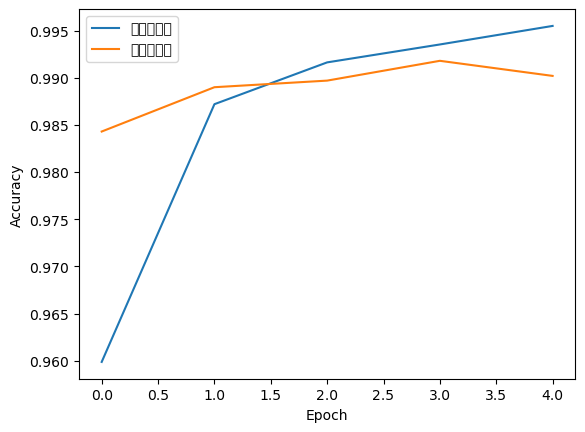

C:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


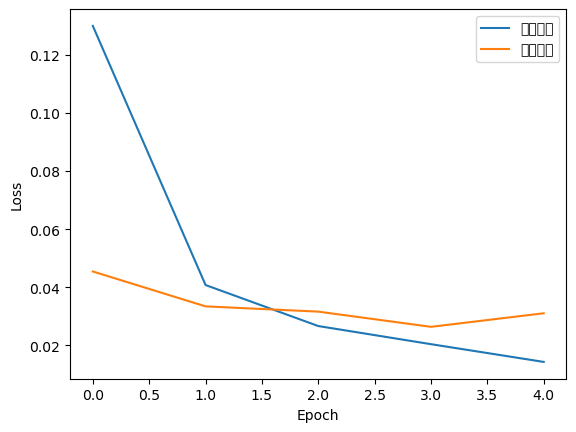

In [3]:

# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 输出训练过程中的准确率和损失
history_dict = history.history
plt.plot(history_dict['accuracy'], label='训练准确率')
plt.plot(history_dict['val_accuracy'], label='验证准确率')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_dict['loss'], label='训练损失')
plt.plot(history_dict['val_loss'], label='验证损失')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9875 - loss: 0.0383
测试集上的损失值: 0.03101273439824581
测试集上的准确率: 0.9901999831199646
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


C:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


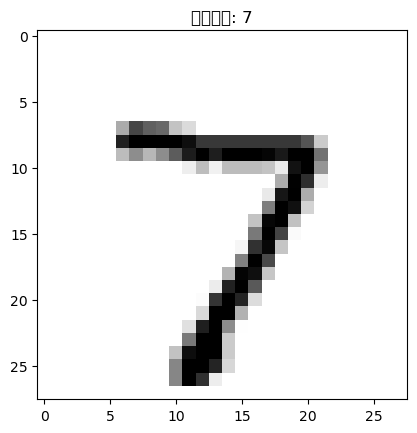

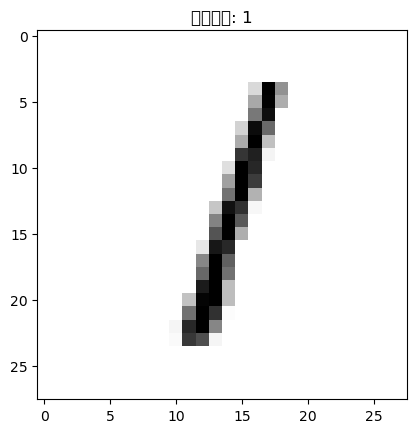

In [4]:





# 测试模型
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"测试集上的损失值: {test_loss}")
print(f"测试集上的准确率: {test_acc}")

# 预测一些样本
predictions = model.predict(x_test[:5])

# 显示前五个测试样本和它们的预测结果
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"预测结果: {predictions[i].argmax()}")
    plt.show()


In [8]:
from PIL import Image
import numpy as np

# 加载手写数字图片
def load_custom_image(image_path):
    """
    加载手写数字图片，并预处理成模型输入格式
    :param image_path: 图片文件路径
    :return: 预处理后的图像数组
    """
    # 打开图片，转换为灰度模式
    img = Image.open(image_path).convert('L')
    
    # 调整图像大小为28x28
    img_resized = img.resize((28, 28))
    
    # 将图像转为numpy数组，并归一化到[0, 1]
    img_array = np.array(img_resized) / 255.0
    
    # 反转颜色（因为手写数字通常是黑底白字）
    img_array = 1.0 - img_array
    
    # 调整形状为模型输入格式：(1, 28, 28, 1)
    img_array = img_array.reshape(1, 28, 28, 1)
    
    return img_array

# 使用模型进行预测
def predict_custom_image(image_path, model):
    """
    使用训练好的模型预测手写数字
    :param image_path: 手写图片路径
    :param model: 已训练好的模型
    :return: 预测结果
    """
    # 加载并预处理图片
    processed_image = load_custom_image(image_path)
    
    # 进行预测
    predictions = model.predict(processed_image)
    
    # 获取预测结果（返回概率最高的类别）
    predicted_label = np.argmax(predictions)
    return predicted_label, predictions

# 调用预测函数
image_path = '2.png'  # 替换为您手写图片的路径
predicted_label, predictions = predict_custom_image(image_path, model)

print(f"Predicted Label: {predicted_label}")
print(f"Prediction Probabilities: {predictions}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Label: 2
Prediction Probabilities: [[1.0437481e-08 2.7980175e-07 9.9999464e-01 2.4960872e-08 2.6279754e-11
  1.3256890e-13 1.7503126e-14 5.0608023e-06 1.4826675e-08 2.7415906e-10]]
